In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
## loading the dataset:
titanic_data = pd.read_csv('train.csv')

In [79]:
## display data
titanic_data.describe()
## notice the max min etc for each feature.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


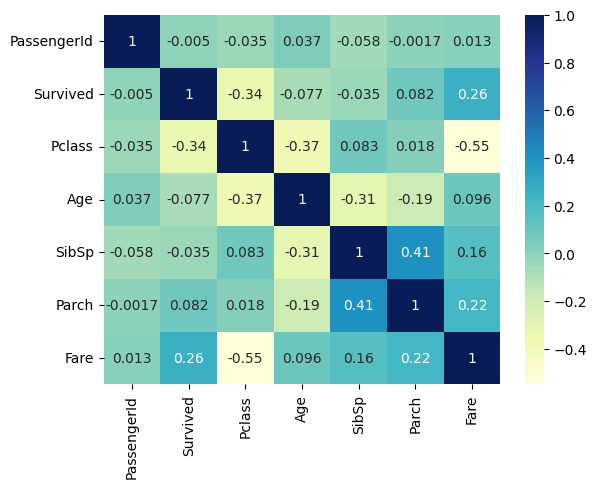

In [80]:
## a correlation heatmap using seaborn
import seaborn as sns

# keep only numeric columns for correlation
corr = titanic_data.corr(numeric_only=True)

sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()
## A value of 1 indicates a perfect positive correlation (as one variable increases, the other also increases), 
## while -1 indicates a perfect negative correlation (as one variable increases, the other decreases). 

In [81]:
## all of the code below will behave as a pipeline in machine learning concept .

In [82]:
## doing a stratified shuffle split where we just randomize the data 
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived","Pclass","Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]


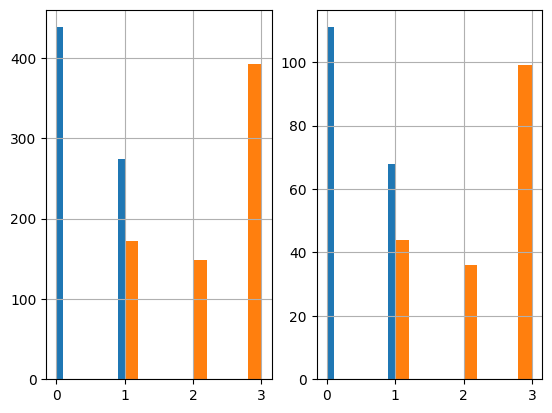

In [83]:
plt. subplot (1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()
plt. subplot (1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()
plt.show()

In [84]:
## check missing values 
## like below , age is missing for most people
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 491 to 422
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        164 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [85]:
##filling missing values using estimators
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer (BaseEstimator, TransformerMixin) :
    def fit (self, X, y=None) :
        return self
    def transform (self, X) :
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [103]:
## giving feature binary numbers instead of abcd with encoding
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder (BaseEstimator, TransformerMixin) :
    
    def fit (self, X, y=None) :
        return self
        
    def transform(self, X):
    # Encode Embarked
       encoder = OneHotEncoder(handle_unknown="ignore")
       matrix = encoder.fit_transform(X[['Embarked']]).toarray()
       column_names = encoder.get_feature_names_out(['Embarked'])
       X[column_names] = matrix

    # Encode Sex
       encoder = OneHotEncoder(handle_unknown="ignore")
       matrix = encoder.fit_transform(X[['Sex']]).toarray()
       column_names = encoder.get_feature_names_out(['Sex'])
       X[column_names] = matrix

       return X


In [104]:
## drop un important features
class FeatureDropper (BaseEstimator, TransformerMixin) :
    
    def fit (self, X, y=None) :
        return self
    def transform (self, X) :
        return X.drop (["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [105]:
## build the pipeline 
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("ageimputer", AgeImputer()),
    ("featureencoder", FeatureEncoder()),
    ("featuredropper", FeatureDropper())
])

In [106]:
## pipeline output:
strat_train_set = pipeline.fit_transform(strat_train_set)

KeyError: "None of [Index(['Embarked'], dtype='object')] are in the [columns]"

In [52]:
##in display , c s q now have binary values, sex colums as well/
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,s,Q,Female,Male
477,478,0,3,29.000000,1,0,7.0458,0.0,0.0,1.0,0.0,1.0
675,676,0,3,18.000000,0,0,7.7750,0.0,0.0,1.0,0.0,1.0
165,166,1,3,9.000000,0,2,20.5250,0.0,0.0,1.0,0.0,1.0
157,158,0,3,30.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
82,83,1,3,29.872947,0,0,7.7875,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,1,1,58.000000,0,0,146.5208,1.0,0.0,0.0,1.0,0.0
52,53,1,1,49.000000,1,0,76.7292,1.0,0.0,0.0,1.0,0.0
98,99,1,2,34.000000,0,1,23.0000,0.0,0.0,1.0,1.0,0.0
472,473,1,2,33.000000,1,2,27.7500,0.0,0.0,1.0,1.0,0.0


In [55]:
## all missing values filled
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 477 to 354
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   s            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [69]:
## scaling
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop (['Survived'], axis=1)
y = strat_train_set ['Survived']

scaler = StandardScaler ()
X_data = scaler.fit_transform (X)
y_data = y.to_numpy ()

In [70]:
## we finally have data in numpy arrays
X_data

array([[ 0.12511677,  0.82789342, -0.06779656, ...,  0.61631563,
        -0.73561236,  0.73561236],
       [ 0.88408675,  0.82789342, -0.92210031, ...,  0.61631563,
        -0.73561236,  0.73561236],
       [-1.07083591,  0.82789342, -1.6210761 , ...,  0.61631563,
        -0.73561236,  0.73561236],
       ...,
       [-1.32765909, -0.37019624,  0.32052332, ...,  0.61631563,
         1.35941164, -1.35941164],
       [ 0.10595086, -0.37019624,  0.24285934, ...,  0.61631563,
         1.35941164, -1.35941164],
       [-0.34636457,  0.82789342,  0.        , ..., -1.62254524,
        -0.73561236,  0.73561236]], shape=(712, 11))

In [72]:
## applying random forest classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_gird = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(clf, param_gird, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)

,estimator,RandomForestClassifier()
,param_grid,"[{'max_depth': [None, 5, ...], 'min_samples_split': [2, 3, ...], 'n_estimators': [10, 100, ...]}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,500


In [75]:
## initial results:
final_clf =grid_search.best_estimator_

In [76]:

final_clf

,n_estimators,500
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [78]:
strat_test_set = pipleline.fit_transform(strat_test_set)

NameError: name 'pipleline' is not defined

In [110]:
## results
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set ['Survived']

scaler = StandardScaler ()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy ()


ValueError: could not convert string to float: 'Beane, Mrs. Edward (Ethel Clarke)'

In [111]:
##result output
final_clf.score(X_data_test, y_data_test)

NameError: name 'X_data_test' is not defined